To get the .shp file of the 44 toronto ward model you will need to donwload them from here:
https://open.toronto.ca/dataset/city-wards/ 



In [1]:
import os
import pandas as pd
import geopandas as gpd # to read in .shp file
import matplotlib.pyplot as plt

In [4]:
ward_map = gpd.read_file('icitw_wgs84.shp') # load .shp map file
ward_map = ward_map.rename(columns={'SCODE_NAME':'Ward #'}) # rename SCODE_NAME to ward_no to match our fires dataframe
ward_map = ward_map.sort_values('Ward #', ascending=True) # order from 1st ward to last
ward_map['Ward #'] = ward_map['Ward #'].astype(int) # convert ward number column to int


In [6]:
ward_map.head()

,GEO_ID,CREATE_ID,NAME,Ward #,LCODE_NAME,TYPE_DESC,TYPE_CODE,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry
18,14630044,63519,Etobicoke North (1),1,WE01,Ward,CITW,19,0.0,0.0,"POLYGON ((-79.63149 43.73755, -79.63323 43.740..."
23,14630045,63519,Etobicoke North (2),2,WE02,Ward,CITW,25,0.0,0.0,"POLYGON ((-79.51142 43.68711, -79.51315 43.686..."
34,14630047,63519,Etobicoke Centre (3),3,WE03,Ward,CITW,38,0.0,0.0,"POLYGON ((-79.56376 43.62704, -79.56379 43.627..."
31,14630046,63519,Etobicoke Centre (4),4,WE04,Ward,CITW,34,0.0,0.0,"POLYGON ((-79.50553 43.66282, -79.50559 43.662..."
37,14630048,63519,Etobicoke-Lakeshore (5),5,WE05,Ward,CITW,43,0.0,0.0,"POLYGON ((-79.55979 43.60506, -79.55984 43.605..."


In [7]:
fires = pd.read_csv(r'response_time_income_per_Ward.csv') # load prepared dataframe containing average response time by ward and income levels

In [8]:
fires.head()

,Ward #,Ward Name,Average response time (minutes),Average Ward Income($)
0,1,Etobicoke North,5.46,70939
1,2,Etobicoke North,6.15,80685
2,3,Etobicoke Centre,6.04,110440
3,4,Etobicoke Centre,5.56,141783
4,5,Etobicoke-Lakeshore,5.56,126802


In [9]:
merged_map = ward_map.merge(fires, on='Ward #')# merge with fires df

In [10]:
merged_map = merged_map.drop(columns=['NAME'])

In [11]:
merged_map.to_csv('merged_map.csv')

In [12]:
merged_map.head()

,GEO_ID,CREATE_ID,Ward #,LCODE_NAME,TYPE_DESC,TYPE_CODE,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry,Ward Name,Average response time (minutes),Average Ward Income($)
0,14630044,63519,1,WE01,Ward,CITW,19,0.0,0.0,"POLYGON ((-79.63149 43.73755, -79.63323 43.740...",Etobicoke North,5.46,70939
1,14630045,63519,2,WE02,Ward,CITW,25,0.0,0.0,"POLYGON ((-79.51142 43.68711, -79.51315 43.686...",Etobicoke North,6.15,80685
2,14630047,63519,3,WE03,Ward,CITW,38,0.0,0.0,"POLYGON ((-79.56376 43.62704, -79.56379 43.627...",Etobicoke Centre,6.04,110440
3,14630046,63519,4,WE04,Ward,CITW,34,0.0,0.0,"POLYGON ((-79.50553 43.66282, -79.50559 43.662...",Etobicoke Centre,5.56,141783
4,14630048,63519,5,WE05,Ward,CITW,43,0.0,0.0,"POLYGON ((-79.55979 43.60506, -79.55984 43.605...",Etobicoke-Lakeshore,5.56,126802


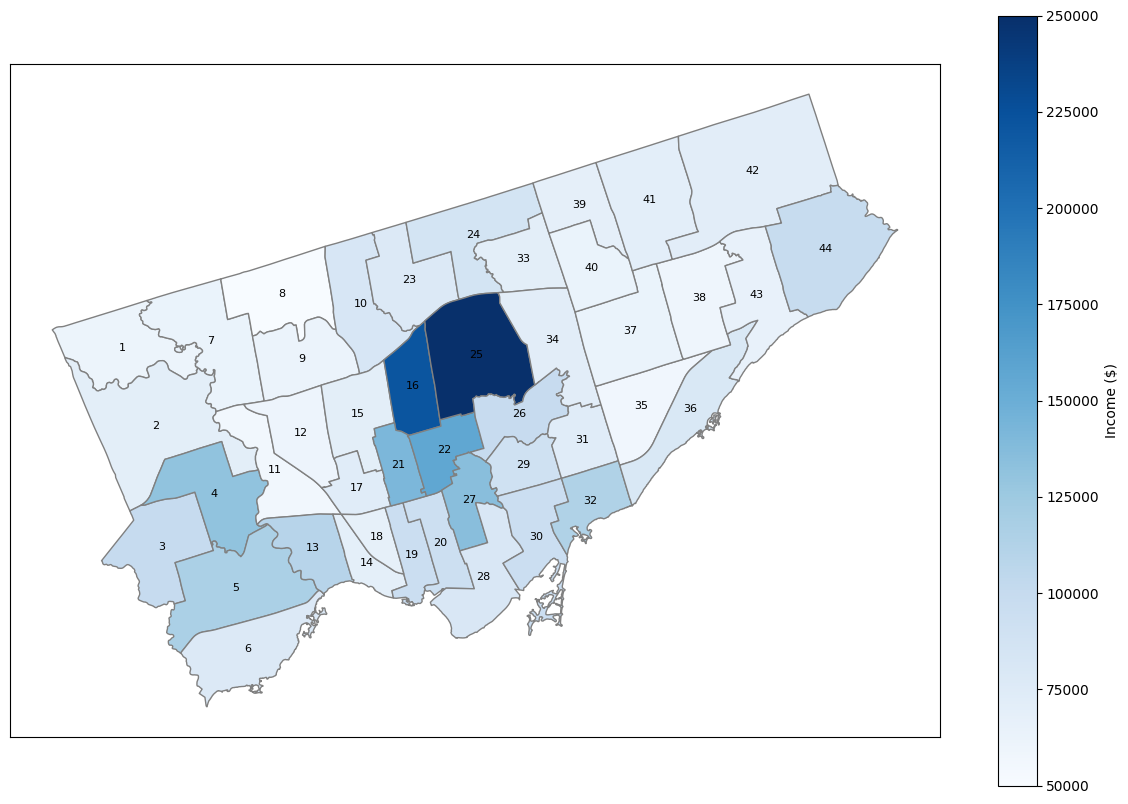

In [13]:
### This cell can be repurposed to create a choropleth map of other features such as the ward income. Simply replace the column
## field below in merged_map.plot(column=[column name]). Just be sure to also change the vmin and vmax values accordingly

fig, ax = plt.subplots(1,figsize=(15,10))
plot = merged_map.plot(column='Average Ward Income($)',cmap="Blues", linewidth=1.0, ax=ax, edgecolor='0.5',label=merged_map['Ward #'])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.tick_params(axis='both', which='both', length=0)
# adding colour bar
colour_bar_info = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=50000, vmax=250000))
colour_bar = fig.colorbar(colour_bar_info, ax=ax)
colour_bar.set_label("Income ($)")

for idx, row in merged_map.iterrows():
    # Get the centroid of the ward shape from the geometry column
    centroid = row.geometry.centroid 
    # Place the ward number in the center(centroid)
    plt.text(centroid.x,centroid.y, str(row['Ward #']),horizontalalignment='center',verticalalignment='center',fontsize=8 
    )
